## Exercise 5
Vi ska ta fram ett neuralt nätverk som kan klassificera handskrivna siffror mellan 0-9.

pip install tensorflow

Vi har 60000 bilder i vårt träningsset och 10000 bilder i vårt testset.
Varje bild är 28x28 pixlar.
Varje bild har en etikett som syftar till vilken siffra mellan 0-9 som bilden visar.
I bilden nedan ser ni ett exempel:


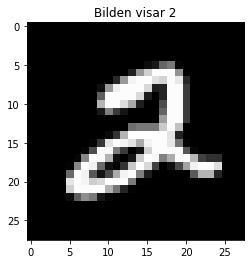

In [5]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'Vi har {x_train.shape[0]} bilder i vårt träningsset och {x_test.shape[0]} bilder i vårt testset.')
print(f'Varje bild är {x_train.shape[1]}x{x_train.shape[2]} pixlar.')
print(f'Varje bild har en etikett som syftar till vilken siffra mellan {y_train.min()}-{y_train.max()} som bilden visar.')
print('I bilden nedan ser ni ett exempel:')
# y_train är etiketterna för varje bild
label = y_train[5]
# X_train är bilderna (bilderna representeras som 28x28 pixlar (matriser))
pixels = x_train[5]
# Plot
plt.title(f'Bilden visar {label}')
plt.imshow(pixels, cmap='gray')
plt.show()

För att arbeta med classification, så måste vi göra om vårt target till en ny form - kategorisk.
Detta innebär, att för varje bild så sätter vi ett värde på hur sannolikt det är att bilden visar den specifika siffran.
Metodiken kallas "One-hot-encoding" och kan genomföras med funktionen keras.utils.to_categorical
Detta innebär att:
2 representeras som [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
Nedan syns ett bildexempel:


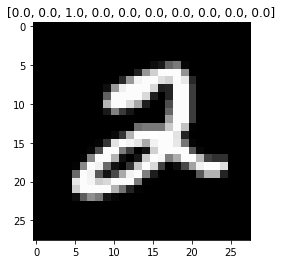

In [6]:
print('För att arbeta med classification, så måste vi göra om vårt target till en ny form - kategorisk.')
print('Detta innebär, att för varje bild så sätter vi ett värde på hur sannolikt det är att bilden visar den specifika siffran.')
print('Metodiken kallas "One-hot-encoding" och kan genomföras med funktionen keras.utils.to_categorical')
print('Detta innebär att:')
print(f'{label} representeras som {list(to_categorical(label, num_classes=10))}')
print('Nedan syns ett bildexempel:')
plt.title(f'{list(to_categorical(label, num_classes=10))}')
plt.imshow(pixels, cmap='gray')
plt.show()


In [7]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

## Neuralt Nätverk

In [9]:
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.optimizers import Adam

# Ett enkelt neuralt nätverk
model = Sequential()
model.add(Flatten(input_shape=(28,28))) #input layer
model.add(Dense(87, activation='sigmoid')) #hidden
model.add(Dense(10, activation='sigmoid')) #output
model.compile(loss='categorical_crossentropy', optimizer='adam')

model.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

# Ett CNN
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model_cnn.add(MaxPooling2D((2,2)))
model_cnn.add(Flatten())
model_cnn.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model_cnn.add(Dense(10, activation='softmax'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam')

model_cnn.fit(x_train, y_train, epochs=10, validation_split=0.2, batch_size=64)

predictions = model.predict(x_test)
predictions_cnn = model_cnn.predict(x_test)

Epoch 1/10
750/750 [==============================] - 2s 2ms/step - loss: 0.6877 - val_loss: 0.3926
Epoch 2/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3727 - val_loss: 0.3288
Epoch 3/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3312 - val_loss: 0.3177
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.3038 - val_loss: 0.2890
Epoch 5/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2987 - val_loss: 0.2907
Epoch 6/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2982 - val_loss: 0.3011
Epoch 7/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2832 - val_loss: 0.2599
Epoch 8/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2652 - val_loss: 0.2623
Epoch 9/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2598 - val_loss: 0.2437
Epoch 10/10
750/750 [==============================] - 2s 2ms/step - loss: 0.2524 - val_loss: 0.2400

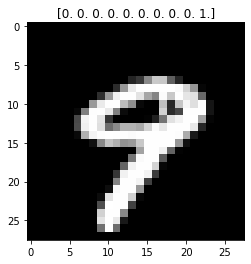

Och vår prediktion för denna bild var:
NN: [0.0032583526, 0.0024589617, 0.015415598, 0.01813174, 0.6317167, 0.019138958, 0.014697591, 0.8440936, 0.28575426, 0.9938208]
CNN: [4.026854e-24, 2.979863e-29, 1.7856668e-15, 1.0962589e-23, 3.763041e-08, 1.3525514e-18, 1.9092302e-33, 6.81666e-13, 3.10762e-16, 0.99999994]


In [10]:
plt.title(f'{y_test[9]}')
plt.imshow(x_test[9], cmap='gray')
plt.show()

print(f'Och vår prediktion för denna bild var:')
print('NN:', list(predictions[9]))
print('CNN:', list(predictions_cnn[9]))

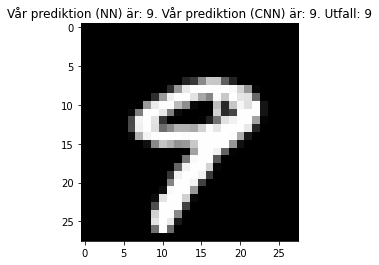

In [11]:
# Vi gör om våra sannolikhets-prediktioner och y_test till faktiska siffror och plottar vad vi tror
y_test_final = np.argmax(y_test, axis=1)
predictions_cnn_final = np.argmax(predictions_cnn, axis=1)
predictions_final = np.argmax(predictions, axis=1)

plt.title(f'Vår prediktion (NN) är: {predictions_final[9]}. Vår prediktion (CNN) är: {predictions_cnn_final[9]}. Utfall: {y_test_final[9]}')
plt.imshow(x_test[9], cmap='gray')
plt.show()


In [22]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

predictions_list = {'NN': predictions_final, 'CNN': predictions_cnn_final}

for pred in predictions_list:
    print(pred)
    acc = accuracy_score(y_test_final, predictions_list[pred])
    recall = recall_score(y_test_final, predictions_list[pred], average=None)
    prec = precision_score(y_test_final, predictions_list[pred],average=None)
    f1 = f1_score(y_test_final, predictions_list[pred], average=None)

    print(f'Accuracy: {acc}')
    print(' ')
    print(f'Recall (for each class): {recall}')
    print(' ')
    print(f'Precision (for each class): {prec}')
    print(' ')
    print(f'F1-score (for each class): {f1}')
    print(' ')
    print('------------------------------')

NN
Accuracy: 0.9197
 
Recall (for each class): [0.96836735 0.98590308 0.89728682 0.88613861 0.93380855 0.87443946
 0.96555324 0.92801556 0.87679671 0.87016848]
 
Precision (for each class): [0.95955511 0.96967071 0.93819656 0.91233435 0.8868472  0.90382387
 0.91584158 0.92263056 0.87950566 0.8986694 ]
 
F1-score (for each class): [0.96394109 0.97771953 0.91728579 0.89904571 0.90972222 0.88888889
 0.94004065 0.92531523 0.8781491  0.88418933]
 
------------------------------
CNN
Accuracy: 0.9781
 
Recall (for each class): [0.98571429 0.98237885 0.97577519 0.99306931 0.97657841 0.98430493
 0.9822547  0.96595331 0.97535934 0.96035679]
 
Precision (for each class): [0.99382716 0.98935226 0.97672163 0.95889101 0.9805726  0.98320269
 0.99052632 0.97640118 0.96153846 0.97094188]
 
F1-score (for each class): [0.9897541  0.98585323 0.97624818 0.97568093 0.97857143 0.9837535
 0.98637317 0.97114914 0.96839959 0.96562033]
 
------------------------------
